In [88]:
%%HTML
<style type="text/css">
    h1{
        color:red;
    } 
    h2{
        color:orange;
    }
    h3{
        color:tomato;
    } 
    h4{
        color:purple;
    }
    h5{
        color:green;
    }
    table{
        border-collapse:collapse; 
    }
    th{
        color:blueviolet;
        background-color:orange;
    }
    td:hover{
        background-color:blueviolet;
        scale:1.2;
        transiction:1s all liner;
        color:white;
        
    }
</style>

In [2]:
import pyecharts.options as opts
from pyecharts.globals import CurrentConfig,NotebookType,ThemeType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts.faker import Faker
from pyecharts.charts import Bar,Scatter

In [3]:
phones = Faker.phones
v = Faker.values

In [4]:
phones

['小米', '三星', '华为', '苹果', '魅族', 'VIVO', 'OPPO']

In [5]:
v

<function pyecharts.faker._Faker.values(start: int = 20, end: int = 150) -> list>

In [6]:
c1 = (
    Bar()
    .add_xaxis(
        phones
    )
    .add_yaxis(
        "",Faker.values()
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="手机销量柱状图"
        ), 
        legend_opts=opts.LegendOpts(
            inactive_color="gray", 
        ), 
        toolbox_opts=opts.ToolboxOpts(), 
        visualmap_opts=opts.VisualMapOpts(),
        datazoom_opts=opts.DataZoomOpts()
        
    )
    .set_series_opts(
        
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_='max'), 
                opts.MarkLineItem(type_='min')
            ]
        ),
        markpoint_opts = opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_='min')
            ]
        )
        
    
    )
)

In [7]:
c1.load_javascript() 

In [8]:
c1.render_notebook() 

# 利用pytorch实现线性回归

In [9]:
import torch
import numpy as np 
import pandas as pd 

In [11]:
data = pd.read_csv("dataset/Income1.csv")

In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [13]:
data.head() 

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [14]:
data.isnull().sum() 

Unnamed: 0    0
Education     0
Income        0
dtype: int64

### 查看是否有重复值

In [15]:
data.duplicated().sum() 

0

In [16]:
data['Education']

0     10.000000
1     10.401338
2     10.842809
3     11.244147
4     11.645485
5     12.086957
6     12.488294
7     12.889632
8     13.290970
9     13.732441
10    14.133779
11    14.535117
12    14.976589
13    15.377926
14    15.779264
15    16.220736
16    16.622074
17    17.023411
18    17.464883
19    17.866221
20    18.267559
21    18.709030
22    19.110368
23    19.511706
24    19.913043
25    20.354515
26    20.755853
27    21.157191
28    21.598662
29    22.000000
Name: Education, dtype: float64

In [17]:
x_lst = data['Education'].to_list() 

In [18]:
x_lst

[10.0,
 10.4013377926421,
 10.8428093645485,
 11.2441471571906,
 11.6454849498328,
 12.0869565217391,
 12.4882943143813,
 12.8896321070234,
 13.2909698996656,
 13.7324414715719,
 14.133779264214,
 14.5351170568562,
 14.9765886287625,
 15.3779264214047,
 15.7792642140468,
 16.2207357859532,
 16.6220735785953,
 17.0234113712375,
 17.4648829431438,
 17.866220735786,
 18.2675585284281,
 18.7090301003344,
 19.1103678929766,
 19.5117056856187,
 19.9130434782609,
 20.3545150501672,
 20.7558528428094,
 21.1571906354515,
 21.5986622073579,
 22.0]

In [19]:
y_lst = data['Income'].to_list()
y_lst

[26.6588387834389,
 27.3064353457772,
 22.1324101716143,
 21.1698405046065,
 15.1926335164307,
 26.3989510407284,
 17.435306578572,
 25.5078852305278,
 36.884594694235,
 39.666108747637,
 34.3962805641312,
 41.4979935356871,
 44.9815748660704,
 47.039595257834,
 48.2525782901863,
 57.0342513373801,
 51.4909192102538,
 61.3366205527288,
 57.581988179306,
 68.5537140185881,
 64.310925303692,
 68.9590086393083,
 74.6146392793647,
 71.8671953042483,
 76.098135379724,
 75.77521802986,
 72.4860553152424,
 77.3550205741877,
 72.1187904524136,
 80.2605705009016]

### 利用echarts绘图

In [77]:
c2 = (
    Bar() 
    .add_xaxis(x_lst)
    .add_yaxis(
        "收入",
        y_lst, 
        label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="收入与教育情况"
        ), 
        legend_opts=opts.LegendOpts(
            inactive_color='red'
        ), 
        toolbox_opts=opts.ToolboxOpts(),
        visualmap_opts=opts.VisualMapOpts(),
        tooltip_opts=opts.TooltipOpts(
            formatter="{a}--{b}:{c}", 
           
        ), 
        datazoom_opts=opts.DataZoomOpts(), 
        xaxis_opts=opts.AxisOpts(
            name="受教育水平", 
            position='end', 
        ), 
        yaxis_opts=opts.AxisOpts(
            name='收入水平',
            position='end',
            
            
        )
        
        
    )
    .set_series_opts(
     
        
    )
)

In [78]:
c2.load_javascript() 

In [79]:
c2.render_notebook() 

In [23]:
c3 = (
    Scatter() 
    .add_xaxis(x_lst)
    .add_yaxis(
        "收入",
        y_lst,label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="收入与教育情况"
        ), 
        legend_opts=opts.LegendOpts(
            inactive_color='red'
        ), 
        toolbox_opts=opts.ToolboxOpts(),
        visualmap_opts=opts.VisualMapOpts(),
        tooltip_opts=opts.TooltipOpts(
            formatter="{a}--{b}:{c}", 
            
        ), 
        datazoom_opts=opts.DataZoomOpts(
            range_start='start',range_end='end',
        ), 
        xaxis_opts=opts.AxisOpts(
            name="受教育水平", 
            position='end', 
            type_='value',
            min_=10
            
        ), 
        yaxis_opts=opts.AxisOpts(
            name='收入水平',
            position='end',
            
        )
        
        
    )
    .set_series_opts(
        
        legend_opts=opts.LegendOpts(
            is_show='False'
        )
       
        
    )
)

In [24]:
c3.render_notebook() 

### 当然也可以使用matplotlib

In [25]:
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams["font.sans-serif"]=["SimHei"]

mpl.rcParams["axes.unicode_minus"]=False



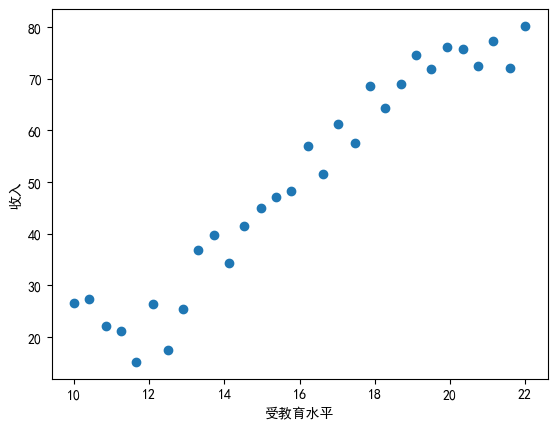

In [26]:
plt.scatter(data.Education,data.Income)
plt.xlabel("受教育水平")
plt.ylabel("收入")
plt.show() 

### 现在准备用nn 来进行实现模型

In [27]:
from torch import nn

#### 数据预处理

因为torch做的是张量积算，所以我们要先将数据转为torch可以识别的模式

In [114]:
# X = data.Education #这样返回的是Serise
X = data.Education.values #这样返回的是ndarry对象
X

array([10.        , 10.40133779, 10.84280936, 11.24414716, 11.64548495,
       12.08695652, 12.48829431, 12.88963211, 13.2909699 , 13.73244147,
       14.13377926, 14.53511706, 14.97658863, 15.37792642, 15.77926421,
       16.22073579, 16.62207358, 17.02341137, 17.46488294, 17.86622074,
       18.26755853, 18.7090301 , 19.11036789, 19.51170569, 19.91304348,
       20.35451505, 20.75585284, 21.15719064, 21.59866221, 22.        ])

但是这样还是不行的，这样只是一个一维数组

所以利用reshape将其转换成30行1列的二维张量,-1是自动计算行数,1是列数,并且将其转换为float32

In [28]:
X = data.Education.values.reshape(-1,1).astype(np.float32)

In [29]:
X

array([[10.      ],
       [10.401338],
       [10.84281 ],
       [11.244147],
       [11.645485],
       [12.086957],
       [12.488295],
       [12.889632],
       [13.29097 ],
       [13.732442],
       [14.13378 ],
       [14.535117],
       [14.976588],
       [15.377927],
       [15.779264],
       [16.220736],
       [16.622074],
       [17.02341 ],
       [17.464884],
       [17.86622 ],
       [18.26756 ],
       [18.70903 ],
       [19.110369],
       [19.511705],
       [19.913044],
       [20.354515],
       [20.755854],
       [21.15719 ],
       [21.598661],
       [22.      ]], dtype=float32)

In [30]:
X.shape

(30, 1)

#### 然后利用torch来将其转变为张量

In [31]:
X_ = torch.from_numpy(X)

In [32]:
X_

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

#### 知道了怎么处理X，接下来就快捷的处理Y

In [33]:
Y_ = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

### 创建linear模型 

#### 开始创建模型

输入和输出的特征都是1，因为找的是受教育和收入两者之间的关系

$output = w(eight)\times input + b(ias) = model(input)$ 

#### 整体流程

##### 创建模型

In [34]:
model = nn.Linear(in_features=1,out_features=1)

##### 创建损失函数

In [35]:
loss_fn = nn.MSELoss() #拿到损失函数

拿到损失函数利用其进行模型优化，常用优化方法  
这里利用随机梯度下降(SGD)  
我们要优化的是模型中的参数如$w,b$  
还要指定学习速率lr（之后会讲）

##### 创建优化方法

In [36]:
opt_ = torch.optim.SGD(model.parameters(),lr=0.0001)

所谓的训练就是把输入带入到模型当中去计算一个预测的结果,
然后将预测的结果与真实的结果放入到损失函数中计算出一个损失  
然后使用优化方法根据损失计算出如何优化变量$w,b$  
我们把全部数据训练一遍叫作epoch,我们可能会训练很多次，那就是多个epoch    
其中opt_中传入的model.parameters()传入的就是权重和偏置，细节看01中案例的分解写法



##### 开训练

1. 利用输入的数据进行预测得到y_pred
2. 得到y_pred后利用损失函数计算预测值与实际值之间的误差
3. 将梯度清零，因为它会累计，我们需要利用得到的权重和偏置(截距)来计算新的梯度达到下降 
4. 进行反向传播，将会得到新的梯度
5. 得到新的梯度后调用优化器进行模型优化

假设我们要训10轮 
```python
for epoch in range(10):
    for x,y in zip(X_,Y_):  
        y_pred =  model(x) 
        loss = loss_fn(y,y_pred)
        #得到loss之后就可以进行反向传播,它就是求解梯度的 

        # 因为每次循环都会产生梯度，它是会进行累计的，会影响到梯度下降
        #首先需要清除原有的梯度,要在优化那一步调用方法zero_grad清零梯度
        opt_.zero_grad()
        #反向传播求解梯度,得到权重和偏置然后决定往哪个方向移动
        loss.backward()  
        
        opt_.step() #然后进行优化,或者叫优化模型参数
```

用gpu来训练

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # 将模型移动到选定设备上

for epoch in range(1000):
    for x, y in zip(X_, Y_):
        # 确保输入数据也在相同的设备上
        x, y = x.to(device), y.to(device)
        
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        # 清除之前的梯度
        opt_.zero_grad()
        # 反向传播
        loss.backward()
        # 更新权重
        opt_.step()

    # print(f"Epoch {epoch+1}/10 completed.")

print("训练完成")

训练完成


##### 查看计算出的权重和截距

In [38]:
model.weight

Parameter containing:
tensor([[3.9452]], device='cuda:0', requires_grad=True)

In [39]:
model.bias

Parameter containing:
tensor([-9.3644], device='cuda:0', requires_grad=True)

##### 绘图看看我们训的模型跑的如何

注意我们要绘图也是要将训练得到的tensor数据转化为matplotlib能认识的数据才行的  
所以还是要进行数据的转换

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

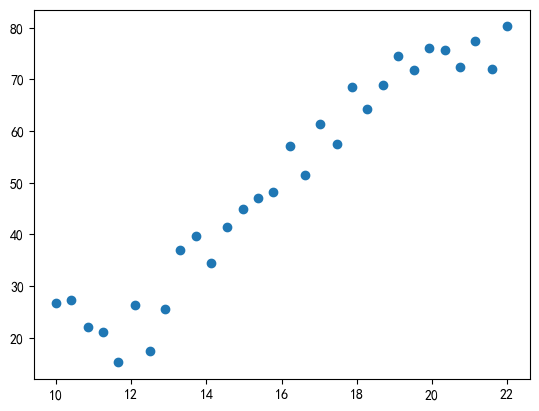

In [134]:
plt.scatter(data.Education,data.Income)
plt.plot(X_.numpy(),model(X_).data.numpy(),c='r')

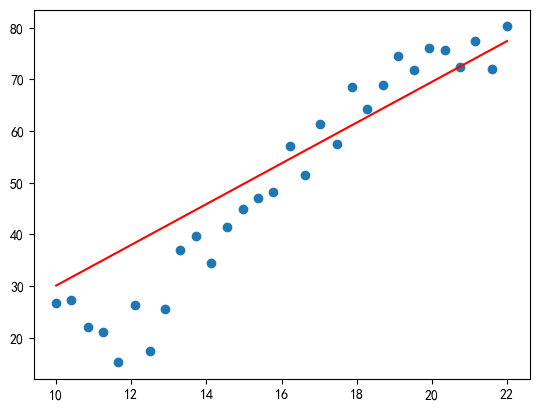

In [40]:
# 假设model已经定义，并且已经在训练后被正确配置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保X_也移动到了与模型相同的设备上
X_on_device = X_.to(device)

# 使用模型预测，然后将结果移回CPU再转换为numpy数组
with torch.no_grad():  # 关闭梯度计算，减少内存占用并加速计算
    predictions = model(X_on_device).cpu().numpy()

# 如果data.Education和data.Income是pandas Series或DataFrame的一部分，
# 确保它们是numpy数组或pandas对象可以直接处理的形式
plt.scatter(data.Education, data.Income)
plt.plot(X_.numpy(), predictions, c='r')  # 注意这里使用的是predictions而不是直接从模型获取的数据

plt.show()

In [41]:
from pyecharts.charts import Line

In [45]:
predictions

array([[30.087885],
       [31.671251],
       [33.412956],
       [34.996323],
       [36.579693],
       [38.321396],
       [39.904762],
       [41.488132],
       [43.0715  ],
       [44.813206],
       [46.396572],
       [47.97994 ],
       [49.72164 ],
       [51.30501 ],
       [52.88838 ],
       [54.63008 ],
       [56.21345 ],
       [57.796814],
       [59.538525],
       [61.121887],
       [62.705257],
       [64.44696 ],
       [66.03033 ],
       [67.61369 ],
       [69.19707 ],
       [70.93877 ],
       [72.52214 ],
       [74.1055  ],
       [75.847206],
       [77.43057 ]], dtype=float32)

In [48]:
predictions.reshape??

Docstring:
a.reshape(shape, order='C')

Returns an array containing the same data with a new shape.

Refer to `numpy.reshape` for full documentation.

See Also
--------
numpy.reshape : equivalent function

Notes
-----
Unlike the free function `numpy.reshape`, this method on `ndarray` allows
the elements of the shape parameter to be passed in as separate arguments.
For example, ``a.reshape(10, 11)`` is equivalent to
``a.reshape((10, 11))``.
Type:      builtin_function_or_method

In [50]:
fin_lst = [i[0] for i in pre_lst] 
fin_lst

[30.0878849029541,
 31.67125129699707,
 33.41295623779297,
 34.99632263183594,
 36.57969284057617,
 38.32139587402344,
 39.904762268066406,
 41.48813247680664,
 43.07149887084961,
 44.81320571899414,
 46.39657211303711,
 47.97993850708008,
 49.721641540527344,
 51.30501174926758,
 52.88837814331055,
 54.63008117675781,
 56.21345138549805,
 57.79681396484375,
 59.53852462768555,
 61.12188720703125,
 62.705257415771484,
 64.44696044921875,
 66.03032684326172,
 67.61369323730469,
 69.19706726074219,
 70.93876647949219,
 72.52214050292969,
 74.10549926757812,
 75.84720611572266,
 77.43057250976562]

In [89]:
c4 = (
    Line() 
    .add_xaxis(x_lst)
    .add_yaxis("收入",fin_lst,is_smooth=True,label_opts=opts.LabelOpts(is_show=False))
   
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="收入与教育情况"
        ), 
        legend_opts=opts.LegendOpts(
            inactive_color='red'
        ), 
        toolbox_opts=opts.ToolboxOpts(),
        visualmap_opts=opts.VisualMapOpts(),
        tooltip_opts=opts.TooltipOpts(
            formatter="{a}--{b}:{c}", 
            
        ), 
        datazoom_opts=opts.DataZoomOpts(
            range_start='start',range_end='end',
        ), 
        xaxis_opts=opts.AxisOpts(
            name="受教育水平", 
            position='end', 
            type_='value',
            min_=10
            
        ), 
        yaxis_opts=opts.AxisOpts(
            name='收入水平',
            position='end',
            
        )
        
        
    )
    .set_series_opts(
        
        legend_opts=opts.LegendOpts(
            is_show='False'
        )
       
    )
    
)

In [90]:
c4.load_javascript() 

In [91]:
c4.render_notebook() 

In [92]:
mix_c = c4.overlap(c3)

In [93]:
mix_c.load_javascript() 

In [94]:
mix_c.render_notebook() 

##### 模型训练完之后可以进行保存也可以将其传入新的输入它将会得出预测的值

利用pickle

In [80]:
import pickle

存储模型

In [81]:
with open('./mymodel/lineardemo1.pkl','wb+') as f:
    pickle.dump(model,f) 

利用模型训练数据 

加载模型

In [85]:
with open('./mymodel/lineardemo1.pkl','rb') as f1: 
    model1 = pickle.load(f1) 

In [86]:
model1.fit(X_,Y_)

AttributeError: 'Linear' object has no attribute 'fit'

您遇到的错误：

```
AttributeError: 'Linear' object has no attribute 'fit'
```

说明你正在尝试调用 `.fit()` 方法，但该方法 **不属于 PyTorch 的 `nn.Linear` 类**。

---

## 🔍 错误原因分析

你在代码中写了类似这样的内容：

```python
model1 = nn.Linear(...)  # 创建了一个线性层
model1.fit(X_, Y_)       # ❌ 错误！Linear 没有 .fit 方法
```

在 PyTorch 中：
- `torch.nn.Linear` 是一个神经网络模块（layer），它只负责前向传播（forward）。
- 它不像 Scikit-learn 的模型那样有 `.fit()` 方法来自动完成训练循环。
- 如果你想训练一个 `Linear` 模型，你需要手动编写训练循环，包括：
  - 前向传播
  - 损失计算（如 MSE）
  - 反向传播
  - 优化器更新参数

---

## ✅ 正确做法：使用 PyTorch 手动训练 Linear 模型

下面是一个完整的示例，演示如何正确训练一个 `Linear` 模型：

```python
import torch
import torch.nn as nn
import torch.optim as optim

# 假设 X_ 和 Y_ 是你的数据，形状为 (样本数, 特征数)
# 示例数据：
X_ = torch.tensor([[1.0], [2.0], [3.0]], dtype=torch.float32)
Y_ = torch.tensor([[2.0], [4.0], [6.0]], dtype=torch.float32)

# 1. 定义模型
model1 = nn.Linear(in_features=1, out_features=1)

# 2. 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

# 3. 训练循环
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model1(X_)
    loss = criterion(outputs, Y_)

    # 反向传播 + 优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
```

---

## 📝 总结

| 问题 | 解决方案 |
|------|----------|
| `AttributeError: 'Linear' object has no attribute 'fit'` | PyTorch 的 `Linear` 层没有 `.fit()` 方法，需要手动写训练循环。 |
| 想要像 sklearn 那样使用 `.fit()` | 可以考虑使用更高层的库如 `skorch` 或切换到 `scikit-learn` 的 `LinearRegression`。 |

---

## 💡 补充建议

如果你想用 `.fit()` 这样的方式训练模型，也可以考虑改用 `scikit-learn`：

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_.numpy(), Y_.numpy())
```

前提是你能将数据转换为 NumPy 数组。

---

如果你愿意提供更详细的代码上下文，我可以帮你把整个流程完善起来。希望这些信息对你有帮助！

In [95]:
model

Linear(in_features=1, out_features=1, bias=True)